# Data Understanding:

Dataset contains several attributes such as:

1.SEVERITYCODE

2.X

3.Y

4.OBJECTID

5.INCKEY

6.COLDETKEY

7.REPORTNO

8.STATUS

9.ADDRTYPE

10.INTKEY

11.LOCATION

12.EXCEPTRSNCODE

13.EXCEPTRSNDESC

14.SEVERITYCODE.1

15.SEVERITYDESC

16.COLLISIONTYPE

17.PERSONCOUNT

18.PEDCOUNT

19.PEDCYLCOUNT

20.VEHCOUNT

21.INCDATE

22.INCDTTM

23.JUNCTIONTYPE

24.SDOT_COLCODE

25.SDOR_COLDESC

26.INATTENTIONIND

27.UNDERINFL

28.WEATHER

29.ROADCOND

30.LIGHTCOND

31.PEDROWNOTGRNT

32.SDOTCOLUMN

33.SPEEDING

34.ST_COLCODE

35.ST_COLDESC

36.SEGLANEKEY

37.CROSSWALKKEY

38.HITPARKEDCAR

# Data Preparation:

The target variable we will be considering for the analysis will be - 'SEVERITYCODE' as it used to depict the severity of the accident. The same is denoted as 0 or 1 within the dataset; where

"0" denotes Property damage
"1" denotes Severe Injury

# Attributes :

We analyzed that the attributes used to describe the severity of an accident are:

"WEATHER"
"ROADCOND"
"ADDRTYPE"
"COLLISIONTYPE"
"LIGHTCOND"

# Data Cleaning

The data needs to be cleanned as it is not fit for analysis. There are unncessary columns and also the datatypes needs changing.

**Importing the Dataset**

In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv',low_memory=False)
df.head()
df.fillna(0)
df.columns

cdf=df[['SEVERITYCODE','WEATHER','ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','ROADCOND', 'LIGHTCOND']]
cdf.head()

cdf.dropna(inplace=True)

C:\Users\SangeethaK\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [3]:

cdf.head()

,SEVERITYCODE,WEATHER,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,ROADCOND,LIGHTCOND
0,2,Overcast,Intersection,Angles,At Intersection (intersection related),Wet,Daylight
1,1,Raining,Block,Sideswipe,Mid-Block (not related to intersection),Wet,Dark - Street Lights On
2,1,Overcast,Block,Parked Car,Mid-Block (not related to intersection),Dry,Daylight
3,1,Clear,Block,Other,Mid-Block (not related to intersection),Dry,Daylight
4,2,Raining,Intersection,Angles,At Intersection (intersection related),Wet,Daylight


In [4]:
cdf.COLLISIONTYPE.value_counts()

Parked Car    43119
Angles        34453
Rear Ended    33641
Other         22960
Sideswipe     18285
Left Turn     13637
Pedestrian     6513
Cycles         5362
Right Turn     2929
Head On        1996
Name: COLLISIONTYPE, dtype: int64

In [5]:

import seaborn as sns

In [6]:
cdf.SEVERITYCODE=cdf.SEVERITYCODE.map(lambda SEVERITYCODE:SEVERITYCODE-1)
cdf.head()

C:\Users\SangeethaK\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,SEVERITYCODE,WEATHER,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,ROADCOND,LIGHTCOND
0,1,Overcast,Intersection,Angles,At Intersection (intersection related),Wet,Daylight
1,0,Raining,Block,Sideswipe,Mid-Block (not related to intersection),Wet,Dark - Street Lights On
2,0,Overcast,Block,Parked Car,Mid-Block (not related to intersection),Dry,Daylight
3,0,Clear,Block,Other,Mid-Block (not related to intersection),Dry,Daylight
4,1,Raining,Intersection,Angles,At Intersection (intersection related),Wet,Daylight


In [7]:
new=cdf[cdf.SEVERITYCODE==1]


In [8]:
new.ADDRTYPE.value_counts()

Block           29252
Intersection    27344
Alley              29
Name: ADDRTYPE, dtype: int64

In [9]:

cdf.drop('JUNCTIONTYPE',axis=1,inplace=True)

new.drop(['JUNCTIONTYPE'],axis=1,inplace=True)

C:\Users\SangeethaK\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
cdf.COLLISIONTYPE.value_counts()

Parked Car    43119
Angles        34453
Rear Ended    33641
Other         22960
Sideswipe     18285
Left Turn     13637
Pedestrian     6513
Cycles         5362
Right Turn     2929
Head On        1996
Name: COLLISIONTYPE, dtype: int64

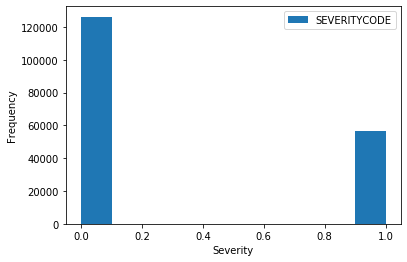

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
cdf.plot(kind='hist')
plt.xlabel('Severity')
plt.ylabel('Frequency')
plt.show()

In [12]:
cdf.SEVERITYCODE.value_counts()

0    126270
1     56625
Name: SEVERITYCODE, dtype: int64

In [13]:

from sklearn.utils import resample
dfmin=cdf[cdf.SEVERITYCODE==1]
dfmaj=cdf[cdf.SEVERITYCODE==0]
df_maj_down=resample(dfmaj,replace=False,n_samples=56657,random_state=123)
df_cust=pd.concat([dfmin,df_maj_down])

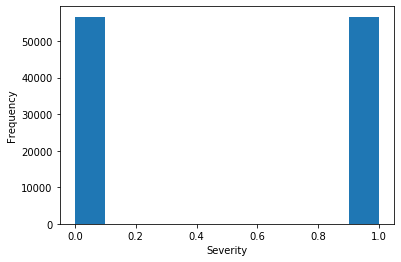

In [14]:

df_cust.SEVERITYCODE.plot(kind='hist')
plt.xlabel('Severity')
plt.ylabel('Frequency')
plt.show()

In [15]:
df_cust = df_cust.reindex(np.random.permutation(df_cust.index))

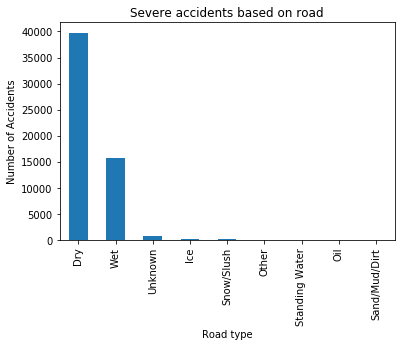

In [16]:
df_cust[df_cust.SEVERITYCODE==1].ROADCOND.value_counts().plot(kind='bar')
plt.title('Severe accidents based on road')
plt.ylabel('Number of Accidents')
plt.xlabel('Road type')
plt.show()

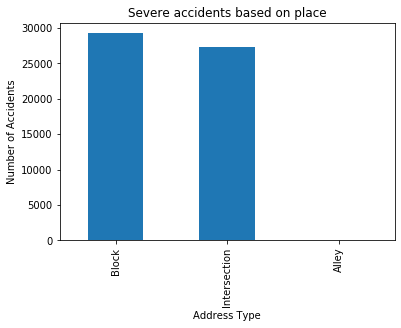

In [17]:
df_cust[df_cust.SEVERITYCODE==1].ADDRTYPE.value_counts().plot(kind='bar')
plt.title('Severe accidents based on place')
plt.ylabel('Number of Accidents')
plt.xlabel('Address Type')
plt.show()

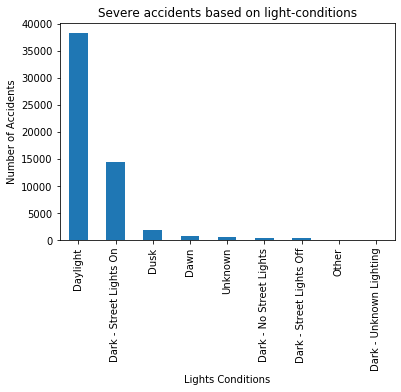

In [18]:
df_cust[df_cust.SEVERITYCODE==1].LIGHTCOND.value_counts().plot(kind='bar')
plt.title('Severe accidents based on light-conditions')
plt.ylabel('Number of Accidents')
plt.xlabel('Lights Conditions')
plt.show()

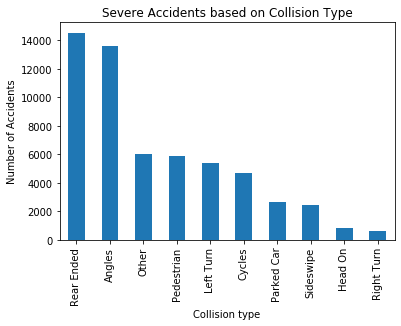

In [19]:
df_cust[df_cust.SEVERITYCODE==1].COLLISIONTYPE.value_counts().plot(kind='bar')
plt.title('Severe Accidents based on Collision Type')
plt.ylabel('Number of Accidents')
plt.xlabel('Collision type')
plt.show()


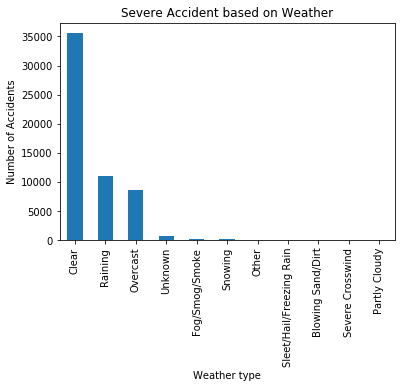

In [20]:
df_cust[df_cust.SEVERITYCODE==1].WEATHER.value_counts().plot(kind='bar')
plt.title('Severe Accident based on Weather')
plt.ylabel('Number of Accidents')
plt.xlabel('Weather type')
plt.show()


In [21]:

df_cust.SEVERITYCODE.value_counts()

0    56657
1    56625
Name: SEVERITYCODE, dtype: int64

In [22]:
for col in df_cust[0:]:
    print(col, ':' , len(df_cust[col].unique()))

SEVERITYCODE : 2
WEATHER : 11
ADDRTYPE : 3
COLLISIONTYPE : 10
ROADCOND : 9
LIGHTCOND : 9


In [23]:

df_collision_freq=df_cust.COLLISIONTYPE.value_counts().to_dict()

In [24]:
df_cust.COLLISIONTYPE=df.COLLISIONTYPE.map(df_collision_freq)

In [25]:

df_cust.head(5)

,SEVERITYCODE,WEATHER,ADDRTYPE,COLLISIONTYPE,ROADCOND,LIGHTCOND
148351,1,Clear,Block,23041.0,Dry,Daylight
159955,1,Raining,Intersection,4999.0,Wet,Daylight
58598,1,Clear,Block,13755.0,Dry,Dark - Street Lights On
7716,1,Clear,Block,13755.0,Dry,Daylight
118827,0,Clear,Block,20719.0,Dry,Daylight


In [26]:
df_road_freq=df_cust.ROADCOND.value_counts().to_dict()
df_cust.ROADCOND=df.ROADCOND.map(df_road_freq)


In [27]:
df_cust.head()

,SEVERITYCODE,WEATHER,ADDRTYPE,COLLISIONTYPE,ROADCOND,LIGHTCOND
148351,1,Clear,Block,23041.0,76729.0,Daylight
159955,1,Raining,Intersection,4999.0,29561.0,Daylight
58598,1,Clear,Block,13755.0,76729.0,Dark - Street Lights On
7716,1,Clear,Block,13755.0,76729.0,Daylight
118827,0,Clear,Block,20719.0,76729.0,Daylight


In [28]:
df_light_freq=df_cust.LIGHTCOND.value_counts().to_dict()

In [29]:
df_cust.LIGHTCOND=df_cust.LIGHTCOND.map(df_light_freq)

In [30]:
df_weather_freq=df_cust.WEATHER.value_counts().to_dict()

In [31]:
df_cust.WEATHER=df_cust.WEATHER.map(df_weather_freq)

In [32]:
addr_dummy=pd.get_dummies(df_cust.ADDRTYPE)
addr_dummy.head(3)

,Alley,Block,Intersection
148351,0,1,0
159955,0,0,1
58598,0,1,0


In [33]:
df_new=df_cust.reset_index()

In [34]:
df_new.head()

,index,SEVERITYCODE,WEATHER,ADDRTYPE,COLLISIONTYPE,ROADCOND,LIGHTCOND
0,148351,1,68555,Block,23041.0,76729.0,72061
1,159955,1,20705,Intersection,4999.0,29561.0,72061
2,58598,1,68555,Block,13755.0,76729.0,29354
3,7716,1,68555,Block,13755.0,76729.0,72061
4,118827,0,68555,Block,20719.0,76729.0,72061


In [35]:
addr_dummy=addr_dummy.reset_index()
addr_dummy.head(3)


,index,Alley,Block,Intersection
0,148351,0,1,0
1,159955,0,0,1
2,58598,0,1,0


In [36]:
addr_dummy.drop('index',axis=1,inplace=True)
addr_dummy.head(3)

,Alley,Block,Intersection
0,0,1,0
1,0,0,1
2,0,1,0


In [37]:
df_new.head()

,index,SEVERITYCODE,WEATHER,ADDRTYPE,COLLISIONTYPE,ROADCOND,LIGHTCOND
0,148351,1,68555,Block,23041.0,76729.0,72061
1,159955,1,20705,Intersection,4999.0,29561.0,72061
2,58598,1,68555,Block,13755.0,76729.0,29354
3,7716,1,68555,Block,13755.0,76729.0,72061
4,118827,0,68555,Block,20719.0,76729.0,72061


In [38]:
df_new2=pd.concat([df_new,addr_dummy],axis=1)

In [39]:
df_new2.drop('ADDRTYPE',axis=1,inplace=True)
df_new2.head()

,index,SEVERITYCODE,WEATHER,COLLISIONTYPE,ROADCOND,LIGHTCOND,Alley,Block,Intersection
0,148351,1,68555,23041.0,76729.0,72061,0,1,0
1,159955,1,20705,4999.0,29561.0,72061,0,0,1
2,58598,1,68555,13755.0,76729.0,29354,0,1,0
3,7716,1,68555,13755.0,76729.0,72061,0,1,0
4,118827,0,68555,20719.0,76729.0,72061,0,1,0


In [40]:
df_new2.columns=[col.upper() for col in df_new2.columns]

In [41]:
df_new2.columns

Index(['INDEX', 'SEVERITYCODE', 'WEATHER', 'COLLISIONTYPE', 'ROADCOND',
       'LIGHTCOND', 'ALLEY', 'BLOCK', 'INTERSECTION'],
      dtype='object')

In [42]:
x_data=df_new2[['WEATHER', 'COLLISIONTYPE', 'ROADCOND',
       'LIGHTCOND', 'ALLEY', 'BLOCK', 'INTERSECTION']]
y_data=df_new2['SEVERITYCODE']
print(x_data.head(3),y_data.head(3))


   WEATHER  COLLISIONTYPE  ROADCOND  LIGHTCOND  ALLEY  BLOCK  INTERSECTION
0    68555        23041.0   76729.0      72061      0      1             0
1    20705         4999.0   29561.0      72061      0      0             1
2    68555        13755.0   76729.0      29354      0      1             0 0    1
1    1
2    1
Name: SEVERITYCODE, dtype: int64


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:

s=StandardScaler()
s.fit(x_data)
x_scale=s.transform(x_data)

In [45]:
x_scale

array([[ 0.80013996,  0.88858629,  0.67249689, ..., -0.03242808,
         0.79020089, -0.788448  ],
       [-1.07291366, -1.73416056, -1.21970605, ..., -0.03242808,
        -1.26550097,  1.26831446],
       [ 0.80013996, -0.46130991,  0.67249689, ..., -0.03242808,
         0.79020089, -0.788448  ],
       ...,
       [-1.07291366,  0.87768362, -1.21970605, ..., -0.03242808,
        -1.26550097,  1.26831446],
       [ 0.80013996, -1.14716068,  0.67249689, ..., -0.03242808,
        -1.26550097,  1.26831446],
       [ 0.80013996,  0.87768362,  0.67249689, ..., -0.03242808,
         0.79020089, -0.788448  ]])

In [46]:

from sklearn.tree import DecisionTreeClassifier

In [47]:
xtrain,xtest,ytrain,ytest=train_test_split(x_scale,y_data,test_size=0.2,random_state=1)

In [48]:

xtrain

array([[ 0.80013996, -1.06793459,  0.67249689, ..., -0.03242808,
        -1.26550097,  1.26831446],
       [ 0.80013996,  0.88858629,  0.67249689, ..., -0.03242808,
         0.79020089, -0.788448  ],
       [ 0.80013996, -0.46130991,  0.67249689, ..., -0.03242808,
         0.79020089, -0.788448  ],
       ...,
       [ 0.80013996, -1.73416056,  0.67249689, ..., -0.03242808,
         0.79020089, -0.788448  ],
       [-1.07291366,  0.88858629, -1.21970605, ..., -0.03242808,
         0.79020089, -0.788448  ],
       [ 0.80013996,  0.88858629,  0.67249689, ..., -0.03242808,
         0.79020089, -0.788448  ]])

In [49]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth=10)
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
yhat=dt.predict(xtest)

In [51]:
from sklearn import metrics
from sklearn.metrics import f1_score
#from sklearn.metrics import jaccard_similarity_score
print('F1 Score:',f1_score(ytest,yhat,average='weighted'))
print('Accuracy-Score:', metrics.accuracy_score(ytest,yhat))

F1 Score: 0.697826973154094
Accuracy-Score: 0.6986803195480425


In [52]:
yhat[0:10]

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
li={}
for k in range(1,10):
    neig=KNeighborsClassifier(n_neighbors=k).fit(xtrain,ytrain)
    yhat=neig.predict(xtest)
    acc_score=metrics.accuracy_score(ytest,yhat)
    li[k]=acc_score
print(li)

{1: 0.5997704903561814, 2: 0.6326080240102396, 3: 0.6780244516043606, 4: 0.6716687999293817, 5: 0.678112724544291, 6: 0.6742287151873593, 7: 0.6846007856291654, 8: 0.684821467978991, 9: 0.6856159244383634}


In [54]:
best_k = max(li, key=li.get)
best_k

9

In [55]:

neig=KNeighborsClassifier(n_neighbors=best_k).fit(xtrain,ytrain)
yhat=neig.predict(xtest)
print('Best K for KNN model :',best_k)

Best K for KNN model : 9


**Logistic Regression**

In [56]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
yhat=lr.predict(xtest)

In [57]:
print('f1 score:',metrics.f1_score(ytest,yhat))
print('Accuracy score:',metrics.accuracy_score(ytest,yhat))


f1 score: 0.5778275475923852
Accuracy score: 0.6006532197554839


**Support Vector Machines (SVM)**

In [ ]:
from sklearn import svm
clf=svm.SVC(kernel='rbf')
clf.fit(xtrain,ytrain)
yhat_svm=clf.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools
cnf=confusion_matrix(ytest,yhat_svm)
np.set_printoptions(precision=2)
print('Classification Report:\n',classification_report(ytest,yhat_svm))

In [ ]:
print('f1 score:' , metrics.f1_score(ytest,yhat_svm))

In [ ]:
print('Accuracy_score:',metrics.accuracy_score(ytest,yhat_svm))